In [1]:
########################################
# importing packages
########################################
import numpy as np # mathematical essentials
import pandas as pd # data science essentials
import matplotlib.pyplot as plt # fundamental data visualization
import seaborn as sns # enhanced visualizations

# packages for unsupervised learning
from sklearn.preprocessing import StandardScaler # standard scaler
from sklearn.decomposition import PCA # pca
from scipy.cluster.hierarchy import dendrogram, linkage # dendrograms
from sklearn.cluster         import KMeans # k-means clustering


########################################
# loading data and setting display options
########################################
# loading data
survey_df = pd.read_excel('./Mobile_App_Survey_Data.xlsx')


# setting print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 100)

In [2]:
########################################
# scree_plot
########################################
def scree_plot(pca_object, export = False):
    """
    Visualizes a scree plot from a pca object.
    
    PARAMETERS
    ----------
    pca_object | A fitted pca object
    export     | Set to True if you would like to save the scree plot to the
               | current working directory (default: False)
    """
    # building a scree plot

    # setting plot size
    fig, ax = plt.subplots(figsize=(10, 8))
    features = range(pca_object.n_components_)


    # developing a scree plot
    plt.plot(features,
             pca_object.explained_variance_ratio_,
             linewidth = 2,
             marker = 'o',
             markersize = 10,
             markeredgecolor = 'black',
             markerfacecolor = 'grey')


    # setting more plot options
    plt.title('Scree Plot')
    plt.xlabel('PCA feature')
    plt.ylabel('Explained Variance')
    plt.xticks(features)

    if export == True:
    
        # exporting the plot
        plt.savefig('./__analysis_images/top_customers_correlation_scree_plot.png')
        
    # displaying the plot
    plt.show()


########################################
# unsupervised_scaler
########################################
def unsupervised_scaler(df):
    """
    Standardizes a dataset (mean = 0, variance = 1). Returns a new DataFrame.
    Requires sklearn.preprocessing.StandardScaler()
    
    PARAMETERS
    ----------
    df     | DataFrame to be used for scaling
    """

    # INSTANTIATING a StandardScaler() object
    scaler = StandardScaler()


    # FITTING the scaler with the data
    scaler.fit(df)


    # TRANSFORMING our data after fit
    x_scaled = scaler.transform(df)

    
    # converting scaled data into a DataFrame
    new_df = pd.DataFrame(x_scaled)


    # reattaching column names
    new_df.columns = df.columns
    
    return new_df

In [3]:
survey_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1552 entries, 0 to 1551
Data columns (total 88 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   caseID  1552 non-null   int64
 1   q1      1552 non-null   int64
 2   q2r1    1552 non-null   int64
 3   q2r2    1552 non-null   int64
 4   q2r3    1552 non-null   int64
 5   q2r4    1552 non-null   int64
 6   q2r5    1552 non-null   int64
 7   q2r6    1552 non-null   int64
 8   q2r7    1552 non-null   int64
 9   q2r8    1552 non-null   int64
 10  q2r9    1552 non-null   int64
 11  q2r10   1552 non-null   int64
 12  q4r1    1552 non-null   int64
 13  q4r2    1552 non-null   int64
 14  q4r3    1552 non-null   int64
 15  q4r4    1552 non-null   int64
 16  q4r5    1552 non-null   int64
 17  q4r6    1552 non-null   int64
 18  q4r7    1552 non-null   int64
 19  q4r8    1552 non-null   int64
 20  q4r9    1552 non-null   int64
 21  q4r10   1552 non-null   int64
 22  q4r11   1552 non-null   int64
 23  q11     1552 

In [4]:
survey_df.head(n = 5)

,caseID,q1,q2r1,q2r2,q2r3,q2r4,q2r5,q2r6,q2r7,q2r8,q2r9,q2r10,q4r1,q4r2,q4r3,q4r4,q4r5,q4r6,q4r7,q4r8,q4r9,q4r10,q4r11,q11,q12,q13r1,q13r2,q13r3,q13r4,q13r5,q13r6,q13r7,q13r8,q13r9,q13r10,q13r11,q13r12,q24r1,q24r2,q24r3,q24r4,q24r5,q24r6,q24r7,q24r8,q24r9,q24r10,q24r11,q24r12,q25r1,q25r2,q25r3,q25r4,q25r5,q25r6,q25r7,q25r8,q25r9,q25r10,q25r11,q25r12,q26r18,q26r3,q26r4,q26r5,q26r6,q26r7,q26r8,q26r9,q26r10,q26r11,q26r12,q26r13,q26r14,q26r15,q26r16,q26r17,q48,q49,q50r1,q50r2,q50r3,q50r4,q50r5,q54,q55,q56,q57
0,1,10,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,1,4,4,4,4,4,4,4,4,4,4,4,5,3,3,5,5,4,5,3,4,3,3,3,5,5,4,5,4,5,4,5,3,3,4,5,5,2,3,3,3,5,5,3,4,6,4,4,4,4,4,4,3,4,1,0,0,0,0,2,2,5,1
1,2,5,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,3,3,1,2,2,1,2,2,2,2,2,2,2,2,1,1,2,1,1,1,1,1,1,1,2,2,1,2,1,2,2,1,2,1,2,2,2,1,2,2,2,2,1,1,3,2,2,1,1,2,2,2,2,2,5,1,0,1,1,0,0,3,2,10,2
2,3,7,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,5,1,3,4,2,4,2,4,4,2,4,4,3,5,3,2,3,3,3,2,3,3,4,5,3,3,5,4,2,5,5,4,4,4,3,3,4,6,1,4,3,5,6,5,5,5,3,5,5,4,5,3,3,4,4,0,0,0,1,0,2,2,6,1
3,4,7,1,1,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,2,2,1,4,4,4,4,2,4,4,2,4,4,4,2,1,1,2,1,1,1,2,2,2,2,3,2,2,2,2,1,2,1,3,2,2,2,1,3,1,1,2,2,4,3,2,2,2,3,2,3,2,2,2,2,1,0,1,1,0,0,1,2,5,1
4,6,2,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,2,3,1,2,3,3,3,2,2,2,4,1,2,2,3,3,3,2,2,3,3,2,3,3,2,2,3,2,3,3,3,3,3,2,2,2,1,1,2,2,1,4,3,3,3,2,3,3,3,3,3,2,3,1,5,2,1,0,0,0,0,3,2,4,2


In [5]:
survey_df['q50r1'].unique()

array([1, 0], dtype=int64)

In [6]:
#Categorize survey question feature
demographic_q = survey_df[['q1','q49','q54','q55','q57','q48','q56']] #leave at the final analysis

psychometric_q = survey_df[['q24r1','q24r2','q24r3','q24r4','q24r5','q24r6','q24r7',
                            'q24r8','q24r9','q24r10','q24r11','q24r12','q25r1','q25r2',
                            'q25r3','q25r4','q25r5','q25r6','q25r7','q25r8','q25r9',
                            'q25r10','q25r11','q25r12','q26r3','q26r4','q26r5',
                            'q26r6','q26r7','q26r8','q26r9','q26r10','q26r11',
                            'q26r12','q26r13','q26r14','q26r15','q26r16','q26r17',
                            'q26r18']]

non_demographic_q = survey_df[['q2r1','q2r2','q2r3','q2r4','q2r5','q2r6','q2r7','q2r8','q2r9',
                    'q2r10','q4r1','q4r2','q4r3','q4r4','q4r5','q4r6','q4r7','q4r8',
                    'q4r9','q4r10','q4r11']]

app_q = survey_df[['q11','q12','q13r1','q13r2','q13r3','q13r4','q13r5','q13r6',
                   'q13r7','q13r8','q13r9','q13r10','q13r11','q13r12']]


# PSYCHOMETRIC

In [7]:
# applying the unsupervised_scaler function
psychometric_scaled = unsupervised_scaler(df = psychometric_q)

# checking pre- and post-scaling variance
print(np.var(psychometric_q), '\n\n')
print(np.var(psychometric_scaled))

q24r1     2.370016
q24r2     0.917307
q24r3     1.972626
q24r4     2.457613
q24r5     2.089064
q24r6     1.096755
q24r7     1.214049
q24r8     1.079791
q24r9     2.602488
q24r10    1.191352
q24r11    1.634449
q24r12    1.062101
q25r1     1.251600
q25r2     1.494538
q25r3     1.175736
q25r4     1.214625
q25r5     1.364530
q25r6     2.392788
q25r7     1.108724
q25r8     1.536148
q25r9     1.247248
q25r10    1.296109
q25r11    1.364405
q25r12    1.770293
q26r3     1.338930
q26r4     1.980670
q26r5     1.755799
q26r6     2.008316
q26r7     2.158827
q26r8     2.144740
q26r9     1.834877
q26r10    1.858299
q26r11    3.082074
q26r12    2.017210
q26r13    2.343706
q26r14    2.008552
q26r15    1.408040
q26r16    2.059268
q26r17    1.634263
q26r18    2.269049
dtype: float64 


q24r1     1.0
q24r2     1.0
q24r3     1.0
q24r4     1.0
q24r5     1.0
q24r6     1.0
q24r7     1.0
q24r8     1.0
q24r9     1.0
q24r10    1.0
q24r11    1.0
q24r12    1.0
q25r1     1.0
q25r2     1.0
q25r3     1.0
q25r4     1.

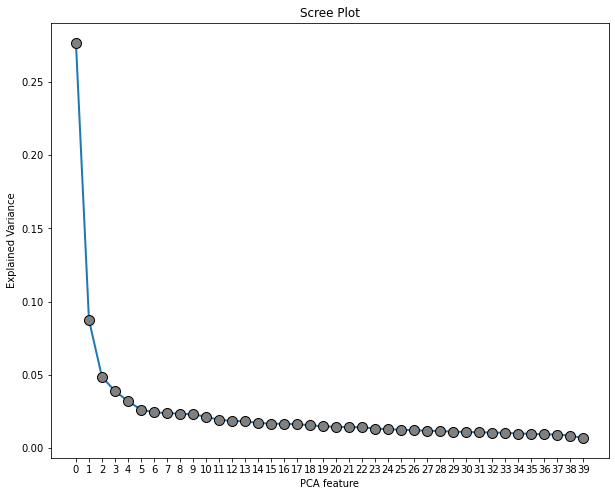

In [8]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_pca = pca.fit_transform(psychometric_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [9]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 3,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_pca = pca.fit_transform(psychometric_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", psychometric_scaled.shape)
print("PCA shape     :", psychometric_pca.shape)

Original shape: (1552, 40)
PCA shape     : (1552, 3)


In [10]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.277
PC 2: 0.087
PC 3: 0.049


In [11]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

0.41284642031859997


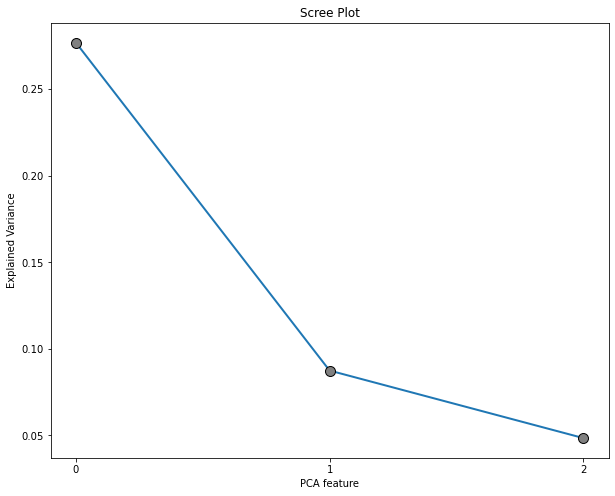

In [12]:
# calling the scree_plot function
scree_plot(pca)

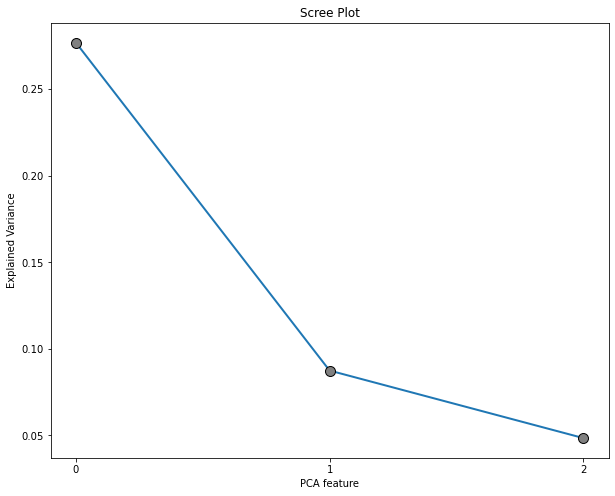

In [13]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 3,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
psychometric_pca = pca.fit_transform(psychometric_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [14]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
psychometric_factor_loadings_df = factor_loadings_df.set_index(psychometric_scaled.columns)


# checking the result
print(psychometric_factor_loadings_df)

           0     1     2
q24r1   0.09 -0.16 -0.08
q24r2   0.12  0.22  0.14
q24r3   0.13  0.07  0.22
q24r4   0.04 -0.23 -0.29
q24r5   0.15 -0.07  0.15
q24r6   0.13  0.18  0.03
q24r7   0.17  0.17  0.12
q24r8   0.15  0.22  0.17
q24r9   0.04 -0.28 -0.31
q24r10  0.18  0.18  0.14
q24r11  0.18  0.16  0.04
q24r12  0.16  0.24  0.08
q25r1   0.19  0.11 -0.24
q25r2   0.19  0.06 -0.22
q25r3   0.18  0.11 -0.16
q25r4   0.18  0.14 -0.26
q25r5   0.20  0.11 -0.08
q25r6   0.07 -0.33 -0.06
q25r7   0.15  0.14 -0.21
q25r8   0.17  0.05 -0.23
q25r9   0.16  0.12 -0.18
q25r10  0.15  0.15 -0.14
q25r11  0.17  0.08 -0.27
q25r12  0.11 -0.09 -0.22
q26r3   0.11  0.02  0.05
q26r4   0.18 -0.18  0.08
q26r5   0.16 -0.17  0.12
q26r6   0.17 -0.09  0.12
q26r7   0.19 -0.18  0.00
q26r8   0.19 -0.13  0.19
q26r9   0.16 -0.02  0.13
q26r10  0.20 -0.05  0.17
q26r11  0.11 -0.21 -0.03
q26r12  0.18 -0.11  0.08
q26r13  0.13 -0.19  0.04
q26r14  0.18 -0.21  0.09
q26r15  0.18 -0.02  0.04
q26r16  0.16 -0.20  0.10
q26r17  0.18 -0.05  0.15


In [15]:
# naming each principal component
psychometric_factor_loadings_df.columns = ['Tech Savvy','Resource User','Active Life Style']


# checking the result
psychometric_factor_loadings_df

,Tech Savvy,Resource User,Active Life Style
q24r1,0.09,-0.16,-0.08
q24r2,0.12,0.22,0.14
q24r3,0.13,0.07,0.22
q24r4,0.04,-0.23,-0.29
q24r5,0.15,-0.07,0.15
q24r6,0.13,0.18,0.03
q24r7,0.17,0.17,0.12
q24r8,0.15,0.22,0.17
q24r9,0.04,-0.28,-0.31
q24r10,0.18,0.18,0.14


In [16]:
# converting into a DataFrame 
psychometric_pca = pd.DataFrame(psychometric_pca)


# renaming columns
psychometric_pca.columns = psychometric_factor_loadings_df.columns


# checking results
psychometric_pca

,Tech Savvy,Resource User,Active Life Style
0,6.818315,1.298784,-2.173796
1,-4.592837,2.425746,0.922767
2,6.275900,0.922374,-0.108685
3,-2.924366,1.549843,0.382791
4,-0.365367,2.356824,0.788182
...,...,...,...
1547,-3.577884,-0.127504,0.289444
1548,-2.574690,-0.328582,-2.563133
1549,-3.579357,1.416554,0.615851
1550,-2.106452,-0.010475,-1.217760


In [17]:
# exploring customers in the Tech Savvy persona
psychometric_pca['Tech Savvy'][psychometric_pca['Tech Savvy'] > 1.0]

0        6.818315
2        6.275900
5        2.280011
8        1.804537
10       1.777030
          ...    
1535     1.477426
1536    10.837056
1540     1.607580
1544     2.036962
1546    11.896130
Name: Tech Savvy, Length: 616, dtype: float64

In [18]:
# exploring customers in the Healthfood Heroes persona
len(psychometric_pca['Tech Savvy'][psychometric_pca['Tech Savvy'] > 1.0])/len(psychometric_pca['Tech Savvy'])


0.39690721649484534

In [19]:
# exploring customers in the Tech Savvy persona
psychometric_pca['Resource User'][psychometric_pca['Resource User'] > 1.0]

0       1.298784
1       2.425746
3       1.549843
4       2.356824
22      2.511675
27      2.052148
29      1.993690
31      2.397285
35      2.356924
38      2.251516
43      3.249702
44      1.970076
47      2.356924
52      1.123414
55      3.866451
59      1.980044
65      2.407857
74      1.558723
76      1.524051
77      1.583081
78      2.063378
81      2.227634
83      2.724863
86      2.173385
90      3.203325
91      1.912482
94      2.249441
95      2.064335
96      5.991078
97      2.290529
102     3.033997
107     2.388982
109     2.617179
112     1.662742
115     3.211726
119     2.504871
122     2.876914
124     2.394387
125     3.120752
126     2.299144
127     1.368341
129     1.338285
131     2.400401
136     2.259868
140     1.583099
146     1.334727
147     1.369197
149     1.830548
150     2.172725
151     2.417037
154     1.251662
156     1.895845
162     1.213827
164     1.862358
165     3.430887
166     1.725340
167     2.356924
168     2.265700
169     1.5151

In [20]:
# exploring customers in the Healthfood Heroes persona
len(psychometric_pca['Resource User'][psychometric_pca['Resource User'] > 1.0])/len(psychometric_pca['Resource User'])


0.3125

In [21]:
# exploring customers in the Tech Savvy persona
psychometric_pca['Active Life Style'][psychometric_pca['Active Life Style'] > 1.0]

5       3.042566
10      1.603146
13      1.095920
14      1.996233
16      3.411378
17      1.178696
20      4.230451
27      1.156961
45      1.808595
48      1.424669
50      1.058303
54      2.205406
61      1.868641
68      1.555749
69      1.037505
72      2.061438
74      1.327959
86      1.083369
88      1.795139
99      2.422306
105     1.360390
113     3.162746
118     1.712784
119     1.158328
126     1.547244
127     1.995934
128     1.212597
135     1.954290
141     4.422546
146     1.286656
148     1.533766
154     1.127087
160     1.465148
162     1.182551
166     2.579656
172     3.903584
174     1.441547
177     1.417437
182     1.914521
184     2.054926
188     1.520198
196     1.367958
197     1.325830
224     1.110434
227     1.230950
228     1.247387
232     1.387033
237     1.255321
246     1.126425
248     1.359529
249     2.412442
253     1.291666
258     2.460456
259     2.505724
264     1.875680
266     1.677005
270     1.469236
273     1.744374
278     2.9995

In [22]:
# exploring customers in the Healthfood Heroes persona
len(psychometric_pca['Active Life Style'][psychometric_pca['Active Life Style'] > 1.0])/len(psychometric_pca['Active Life Style'])


0.21456185567010308

# NON_DEMOGRAPHIC

In [23]:
# applying the unsupervised_scaler function
non_demographic_scaled = unsupervised_scaler(df = non_demographic_q)

# checking pre- and post-scaling variance
print(np.var(non_demographic_q), '\n\n')
print(np.var(non_demographic_scaled))

q2r1     0.249990
q2r2     0.182908
q2r3     0.231517
q2r4     0.160617
q2r5     0.052342
q2r6     0.080481
q2r7     0.039537
q2r8     0.156329
q2r9     0.035975
q2r10    0.000000
q4r1     0.212136
q4r2     0.154745
q4r3     0.248698
q4r4     0.195295
q4r5     0.179871
q4r6     0.151941
q4r7     0.248962
q4r8     0.249232
q4r9     0.227073
q4r10    0.072972
q4r11    0.017094
dtype: float64 


q2r1     1.0
q2r2     1.0
q2r3     1.0
q2r4     1.0
q2r5     1.0
q2r6     1.0
q2r7     1.0
q2r8     1.0
q2r9     1.0
q2r10    0.0
q4r1     1.0
q4r2     1.0
q4r3     1.0
q4r4     1.0
q4r5     1.0
q4r6     1.0
q4r7     1.0
q4r8     1.0
q4r9     1.0
q4r10    1.0
q4r11    1.0
dtype: float64


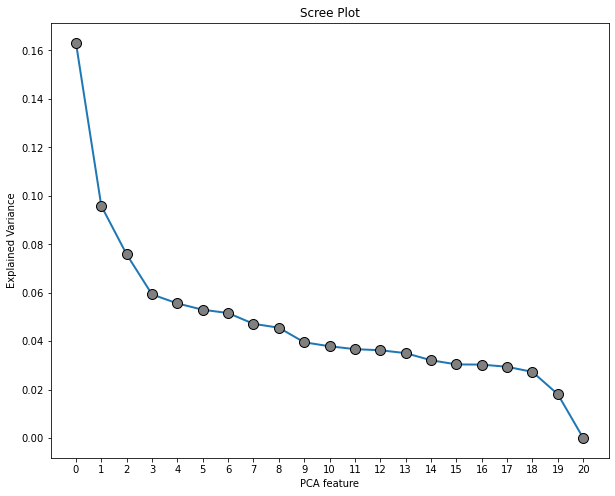

In [24]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
non_demographic_pca = pca.fit_transform(non_demographic_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [25]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
non_demographic_pca = pca.fit_transform(non_demographic_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", non_demographic_scaled.shape)
print("PCA shape     :", non_demographic_pca.shape)

Original shape: (1552, 21)
PCA shape     : (1552, 4)


In [26]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.163
PC 2: 0.096
PC 3: 0.076
PC 4: 0.059


In [27]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

0.39406464453030143


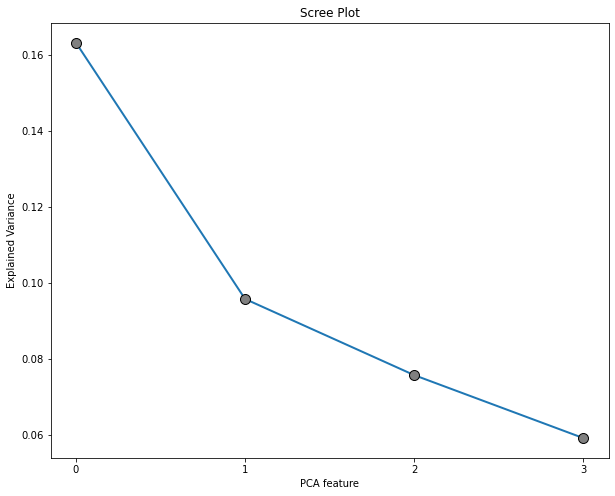

In [28]:
# calling the scree_plot function
scree_plot(pca)

In [29]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
non_demographic_factor_loadings_df = factor_loadings_df.set_index(non_demographic_scaled.columns)


# checking the result
print(non_demographic_factor_loadings_df)

          0     1     2     3
q2r1   0.20 -0.30  0.52 -0.17
q2r2   0.24  0.14  0.10 -0.11
q2r3   0.00  0.14 -0.64  0.01
q2r4   0.11  0.30 -0.01 -0.01
q2r5   0.15  0.40  0.06 -0.29
q2r6   0.15  0.40  0.04 -0.19
q2r7   0.16  0.39  0.02 -0.31
q2r8   0.26  0.05  0.16 -0.19
q2r9  -0.07  0.11  0.07  0.33
q2r10 -0.00  0.00 -0.00 -0.00
q4r1   0.24 -0.28  0.02 -0.23
q4r2   0.32  0.14  0.01  0.30
q4r3   0.31 -0.08 -0.12  0.26
q4r4   0.32  0.13 -0.04  0.33
q4r5   0.21 -0.17 -0.34 -0.15
q4r6   0.19 -0.24 -0.28 -0.21
q4r7   0.29 -0.08 -0.02  0.17
q4r8   0.30 -0.10 -0.01  0.19
q4r9   0.32 -0.06  0.11  0.17
q4r10 -0.03 -0.07  0.07 -0.08
q4r11 -0.17  0.25  0.23  0.33


In [30]:
# naming each principal component
non_demographic_factor_loadings_df.columns = ['Loyal Brander & All Inclusive',
                                           'Work releated user','Single Device Gamer User', 
                                          'Nonbrand Media watcher']


# checking the result
non_demographic_factor_loadings_df

,Loyal Brander & All Inclusive,Work releated user,Single Device Gamer User,Nonbrand Media watcher
q2r1,0.20,-0.30,0.52,-0.17
q2r2,0.24,0.14,0.10,-0.11
q2r3,0.00,0.14,-0.64,0.01
q2r4,0.11,0.30,-0.01,-0.01
q2r5,0.15,0.40,0.06,-0.29
q2r6,0.15,0.40,0.04,-0.19
q2r7,0.16,0.39,0.02,-0.31
q2r8,0.26,0.05,0.16,-0.19
q2r9,-0.07,0.11,0.07,0.33
q2r10,-0.00,0.00,-0.00,-0.00


In [31]:
# converting into a DataFrame 
non_demographic_pca = pd.DataFrame(non_demographic_pca)


# renaming columns
non_demographic_pca.columns = non_demographic_factor_loadings_df.columns


# checking results
non_demographic_pca

,Loyal Brander & All Inclusive,Work releated user,Single Device Gamer User,Nonbrand Media watcher
0,-2.695549,0.656707,-1.079045,-0.072880
1,-0.351807,1.679391,-0.428458,2.818885
2,-1.554971,1.689447,-0.261832,-1.746624
3,-0.383728,0.240065,1.178624,0.576785
4,-2.269142,-0.213434,2.071672,-0.447075
...,...,...,...,...
1547,1.884019,-1.070657,0.488161,0.464450
1548,1.742252,-1.310783,0.882380,-0.808207
1549,4.222162,-0.024580,1.027122,1.005163
1550,1.175144,-1.569574,-0.838501,0.308298


# APP

In [32]:
# applying the unsupervised_scaler function
app_scaled = unsupervised_scaler(df = app_q)

# checking pre- and post-scaling variance
print(np.var(app_q), '\n\n')
print(np.var(app_scaled))

q11       1.041629
q12       1.801433
q13r1     0.768333
q13r2     1.538911
q13r3     1.019038
q13r4     1.393160
q13r5     1.150461
q13r6     0.644934
q13r7     0.915226
q13r8     0.983015
q13r9     1.360026
q13r10    1.393093
q13r11    1.140896
q13r12    1.584795
dtype: float64 


q11       1.0
q12       1.0
q13r1     1.0
q13r2     1.0
q13r3     1.0
q13r4     1.0
q13r5     1.0
q13r6     1.0
q13r7     1.0
q13r8     1.0
q13r9     1.0
q13r10    1.0
q13r11    1.0
q13r12    1.0
dtype: float64


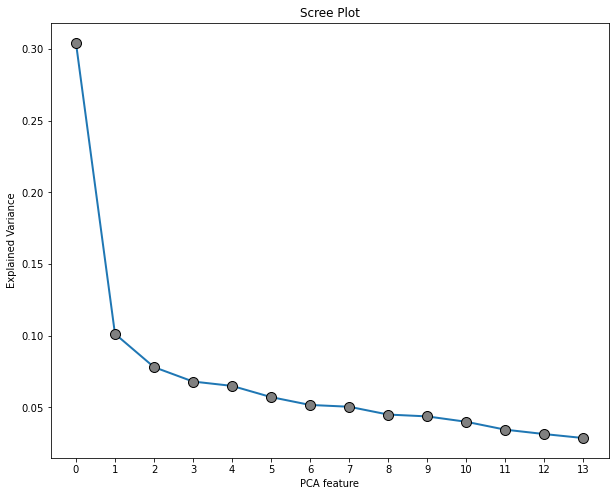

In [33]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = None,
          random_state = 219)


# FITTING and TRANSFORMING the scaled data
app_pca = pca.fit_transform(app_scaled)


# calling the scree_plot function
scree_plot(pca_object = pca)

In [34]:
# INSTANTIATING a PCA object with no limit to principal components
pca = PCA(n_components = 4,
            random_state = 219)


# FITTING and TRANSFORMING the scaled data
app_pca = pca.fit_transform(app_scaled)


# comparing dimensions of each DataFrame
print("Original shape:", app_scaled.shape)
print("PCA shape     :", app_pca.shape)

Original shape: (1552, 14)
PCA shape     : (1552, 4)


In [35]:
# component number counter
component_number = 0

# looping over each principal component
for variance in pca.explained_variance_ratio_:
    component_number += 1
    
    print(f"PC {component_number}: {variance.round(3)}")

PC 1: 0.304
PC 2: 0.101
PC 3: 0.078
PC 4: 0.068


In [36]:
# printing the sum of all explained variance ratios
print(pca.explained_variance_ratio_.sum())

0.5519194458237513


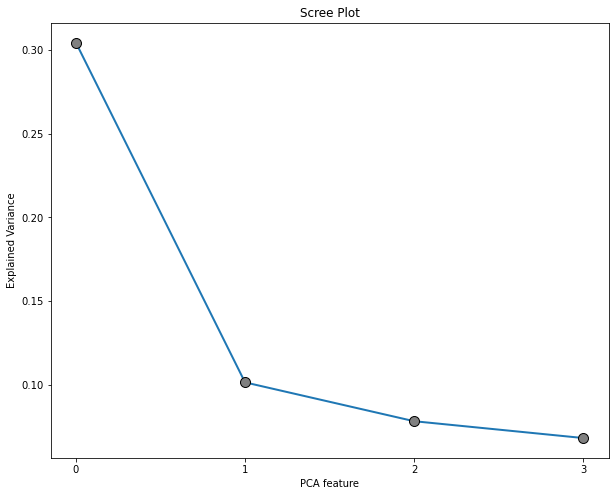

In [37]:
# calling the scree_plot function
scree_plot(pca)

In [38]:
# transposing pca components
factor_loadings_df = pd.DataFrame(np.transpose(pca.components_.round(decimals = 2)))


# naming rows as original features
app_factor_loadings_df = factor_loadings_df.set_index(app_scaled.columns)


# checking the result
print(app_factor_loadings_df)

           0     1     2     3
q11     0.02 -0.49  0.49 -0.26
q12    -0.16 -0.17 -0.29 -0.21
q13r1  -0.11  0.36  0.52  0.50
q13r2  -0.30  0.04  0.01  0.44
q13r3  -0.34 -0.27  0.08  0.18
q13r4  -0.22  0.33 -0.07 -0.29
q13r5  -0.33 -0.02  0.00 -0.14
q13r6  -0.21  0.25  0.45 -0.27
q13r7  -0.36 -0.26 -0.03  0.02
q13r8  -0.37 -0.08 -0.04 -0.06
q13r9  -0.30 -0.28  0.17 -0.05
q13r10 -0.26  0.31 -0.22 -0.13
q13r11 -0.28 -0.05 -0.33  0.30
q13r12 -0.24  0.32  0.08 -0.34


In [39]:
# naming each principal component
app_factor_loadings_df.columns = ['Non-app Enthusiasm','Media Streamer',
                                  'Aware but Private','Nonbrand Media watcher']


# checking the result
app_factor_loadings_df

,Non-app Enthusiasm,Media Streamer,Aware but Private,Nonbrand Media watcher
q11,0.02,-0.49,0.49,-0.26
q12,-0.16,-0.17,-0.29,-0.21
q13r1,-0.11,0.36,0.52,0.50
q13r2,-0.30,0.04,0.01,0.44
q13r3,-0.34,-0.27,0.08,0.18
q13r4,-0.22,0.33,-0.07,-0.29
q13r5,-0.33,-0.02,0.00,-0.14
q13r6,-0.21,0.25,0.45,-0.27
q13r7,-0.36,-0.26,-0.03,0.02
q13r8,-0.37,-0.08,-0.04,-0.06


In [40]:
# converting into a DataFrame 
app_pca = pd.DataFrame(app_pca)


# renaming columns
app_pca.columns = app_factor_loadings_df.columns


# checking results
app_pca

,Non-app Enthusiasm,Media Streamer,Aware but Private,Nonbrand Media watcher
0,-2.895073,2.467685,0.488530,-0.292128
1,3.120662,0.520045,0.604544,-0.158079
2,-1.532506,0.980578,-1.753240,0.253113
3,-1.963231,1.712733,-0.677650,0.052743
4,1.782296,0.538104,0.563793,-0.318806
...,...,...,...,...
1547,0.660860,0.009302,-0.762645,1.194119
1548,-1.513172,-1.158494,0.785751,0.163075
1549,4.441547,0.528599,0.720382,0.708014
1550,0.010765,-1.671919,-0.693734,1.806796


# Clustering

In [41]:
# checking variance amongst clusters
np.var(psychometric_factor_loadings_df)

Tech Savvy           0.001597
Resource User        0.025005
Active Life Style    0.024867
dtype: float64

In [42]:
# checking variance amongst clusters
np.var(non_demographic_factor_loadings_df)

Loyal Brander & All Inclusive    0.019737
Work releated user               0.045075
Single Device Gamer User         0.047951
Nonbrand Media watcher           0.047459
dtype: float64

In [43]:
# checking variance amongst clusters
np.var(app_factor_loadings_df)

Non-app Enthusiasm        0.010720
Media Streamer            0.071307
Aware but Private         0.068255
Nonbrand Media watcher    0.070460
dtype: float64

In [44]:
#concat three features question together
pca_full_df = pd.concat([psychometric_pca, non_demographic_pca, app_pca], axis=1)

pca_full_df

,Tech Savvy,Resource User,Active Life Style,Loyal Brander & All Inclusive,Work releated user,Single Device Gamer User,Nonbrand Media watcher,Non-app Enthusiasm,Media Streamer,Aware but Private,Nonbrand Media watcher
0,6.818315,1.298784,-2.173796,-2.695549,0.656707,-1.079045,-0.072880,-2.895073,2.467685,0.488530,-0.292128
1,-4.592837,2.425746,0.922767,-0.351807,1.679391,-0.428458,2.818885,3.120662,0.520045,0.604544,-0.158079
2,6.275900,0.922374,-0.108685,-1.554971,1.689447,-0.261832,-1.746624,-1.532506,0.980578,-1.753240,0.253113
3,-2.924366,1.549843,0.382791,-0.383728,0.240065,1.178624,0.576785,-1.963231,1.712733,-0.677650,0.052743
4,-0.365367,2.356824,0.788182,-2.269142,-0.213434,2.071672,-0.447075,1.782296,0.538104,0.563793,-0.318806
...,...,...,...,...,...,...,...,...,...,...,...
1547,-3.577884,-0.127504,0.289444,1.884019,-1.070657,0.488161,0.464450,0.660860,0.009302,-0.762645,1.194119
1548,-2.574690,-0.328582,-2.563133,1.742252,-1.310783,0.882380,-0.808207,-1.513172,-1.158494,0.785751,0.163075
1549,-3.579357,1.416554,0.615851,4.222162,-0.024580,1.027122,1.005163,4.441547,0.528599,0.720382,0.708014
1550,-2.106452,-0.010475,-1.217760,1.175144,-1.569574,-0.838501,0.308298,0.010765,-1.671919,-0.693734,1.806796


In [45]:
# applying the unsupervised_scaler function
pca_scaled_full = unsupervised_scaler(df = pca_full_df)


# checking pre- and post-scaling variance
print(np.var(pca_scaled_full), '\n\n')
print(np.var(pca_full_df))

Tech Savvy                       1.0
Resource User                    1.0
Active Life Style                1.0
Loyal Brander & All Inclusive    1.0
Work releated user               1.0
Single Device Gamer User         1.0
Nonbrand Media watcher           1.0
Non-app Enthusiasm               1.0
Media Streamer                   1.0
Aware but Private                1.0
Nonbrand Media watcher           1.0
dtype: float64 


Tech Savvy                       11.072911
Resource User                     3.499891
Active Life Style                 1.941055
Loyal Brander & All Inclusive     3.264381
Work releated user                1.916355
Single Device Gamer User          1.515827
Nonbrand Media watcher            1.184731
Non-app Enthusiasm                4.260929
Media Streamer                    1.418872
Aware but Private                 1.093923
Nonbrand Media watcher            0.953149
dtype: float64


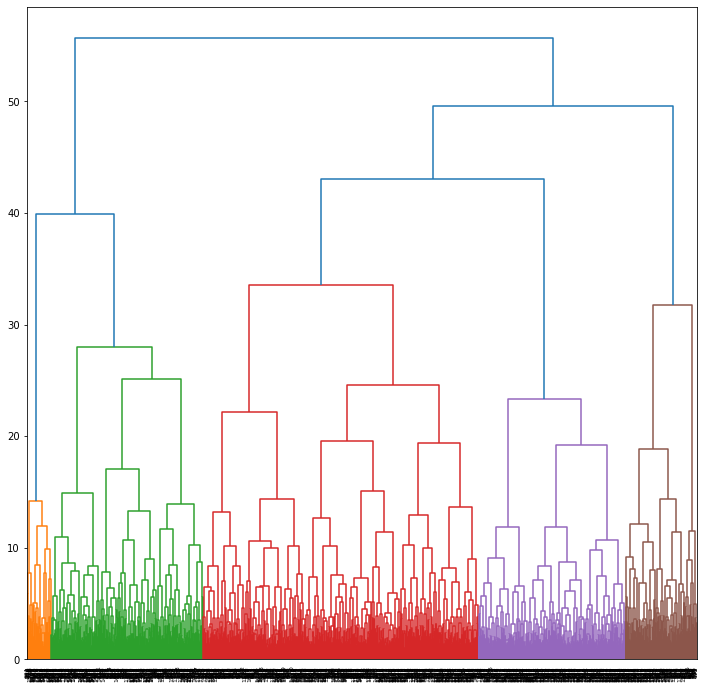

In [46]:
# grouping data based on Ward distance
standard_mergings_ward = linkage(y = pca_scaled_full,
                                 method = 'ward',
                                 optimal_ordering = True)


# setting plot size
fig, ax = plt.subplots(figsize=(12, 12))

# developing a dendrogram
dendrogram(Z = standard_mergings_ward,
           leaf_rotation = 90,
           leaf_font_size = 6)


# rendering the plot
plt.show()

In [47]:
# INSTANTIATING a k-Means object with three clusters
survey_k_pca = KMeans(n_clusters   = 5,
                        random_state = 219)


# fitting the object to the data
survey_k_pca.fit(pca_scaled_full)


# converting the clusters to a DataFrame
survey_kmeans_pca = pd.DataFrame({'Cluster': survey_k_pca.labels_})


# checking the results
print(survey_kmeans_pca.iloc[: , 0].value_counts())

3    511
4    501
1    295
2    192
0     53
Name: Cluster, dtype: int64


In [48]:
# storing cluster centers
centroids_pca = survey_k_pca.cluster_centers_


# converting cluster centers into a DataFrame
centroids_pca_df = pd.DataFrame(centroids_pca)


# renaming principal components
centroids_pca_df.columns = ['Tech Savvy','Resource User','Active Life Style',
                            'Loyal Brander & All Inclusive','Work releated user',
                            'Single Device Gamer User','Nonbrand Media watcher',
                            'Loyal Brander & All Inclusive','Work releated user',
                            'Single Device Gamer User','Nonbrand Media watcher']

# checking results (clusters = rows, pc = columns)
centroids_pca_df.round(2)

,Tech Savvy,Resource User,Active Life Style,Loyal Brander & All Inclusive,Work releated user,Single Device Gamer User,Nonbrand Media watcher,Loyal Brander & All Inclusive,Work releated user,Single Device Gamer User,Nonbrand Media watcher
0,-0.59,0.82,-0.04,2.07,3.20,0.30,-1.70,1.46,0.35,0.35,-0.10
1,-0.95,0.64,0.05,0.67,0.09,-0.18,0.70,1.25,0.21,-0.02,-0.11
2,0.78,0.36,0.67,-0.81,0.47,0.93,0.46,-0.54,1.17,1.00,1.02
3,0.29,-0.00,0.00,-0.55,0.16,-0.73,-0.16,-0.42,0.12,-0.71,-0.13
4,0.02,-0.60,-0.29,0.26,-0.73,0.46,-0.24,-0.25,-0.73,0.32,-0.18


In [52]:
pca_full_df

,Tech Savvy,Resource User,Active Life Style,Loyal Brander & All Inclusive,Work releated user,Single Device Gamer User,Nonbrand Media watcher,Non-app Enthusiasm,Media Streamer,Aware but Private,Nonbrand Media watcher
0,6.818315,1.298784,-2.173796,-2.695549,0.656707,-1.079045,-0.072880,-2.895073,2.467685,0.488530,-0.292128
1,-4.592837,2.425746,0.922767,-0.351807,1.679391,-0.428458,2.818885,3.120662,0.520045,0.604544,-0.158079
2,6.275900,0.922374,-0.108685,-1.554971,1.689447,-0.261832,-1.746624,-1.532506,0.980578,-1.753240,0.253113
3,-2.924366,1.549843,0.382791,-0.383728,0.240065,1.178624,0.576785,-1.963231,1.712733,-0.677650,0.052743
4,-0.365367,2.356824,0.788182,-2.269142,-0.213434,2.071672,-0.447075,1.782296,0.538104,0.563793,-0.318806
...,...,...,...,...,...,...,...,...,...,...,...
1547,-3.577884,-0.127504,0.289444,1.884019,-1.070657,0.488161,0.464450,0.660860,0.009302,-0.762645,1.194119
1548,-2.574690,-0.328582,-2.563133,1.742252,-1.310783,0.882380,-0.808207,-1.513172,-1.158494,0.785751,0.163075
1549,-3.579357,1.416554,0.615851,4.222162,-0.024580,1.027122,1.005163,4.441547,0.528599,0.720382,0.708014
1550,-2.106452,-0.010475,-1.217760,1.175144,-1.569574,-0.838501,0.308298,0.010765,-1.671919,-0.693734,1.806796


In [54]:
# concatinating cluster memberships with principal components
clst_pca_df = pd.concat([survey_kmeans_pca,
                          pca_full_df],
                          axis = 1)


# concatenating demographic information with pca-clusters
final_pca_clust_df = pd.concat([survey_df.loc[ : , ['q1','q49','q54','q55','q57','q48','q56']],
                                clst_pca_df.round(decimals = 2)],
                                axis = 1)


# renaming columns
final_pca_clust_df.columns = ['Age','Marital Status','Race','Hispanic/ Latino',
                              'Gender','Education','Income','Cluster','Tech Savvy',
                              'Resource User','Active Life Style','Loyal Brander & All Inclusive',
                              'Work releated user','Single Device Gamer User',
                              'Nonbrand Media watcher','Loyal Brander & All Inclusive',
                              'Work releated user','Single Device Gamer User',
                              'Nonbrand Media watcher']

# renaming age
age_names = {1 : 'Under 18',
             2 : '18-24',
             3 : '25-29',
             4 : '30-34',
             5 : '35-39',
             6 : '40-44',
             7 : '45-49',
             8 : '50-54',
             9 : '55-59',
             10: '60-64',
             11: '65 or over'}


final_pca_clust_df['Age'].replace(age_names, inplace = True)



# renaming marital status
marital_status_names = {1 : 'Married',
                        2 : 'Single',
                        3 : 'Single with a partner',
                        4 : 'Separated/Widowed/Divorced'}


final_pca_clust_df['Marital Status'].replace(marital_status_names, inplace = True)



# renaming race
race_names = {1 : 'White or Caucasian',
              2 : 'Black or African American',
              3 : 'Asian',
              4 : 'Native Hawaiian or Other Pacific Islander',
              5 : 'American Indian or Alaska Native',
              6 : 'Other race'}


final_pca_clust_df['Race'].replace(race_names, inplace = True)



# renaming Hispanic/ Latino
hispanic_latino_names = {1 : 'Yes',
                         2 : 'No'}


final_pca_clust_df['Hispanic/ Latino'].replace(hispanic_latino_names, inplace = True)



# renaming gender
gender_names = {1 : 'Male',
                2 : 'Female'}


final_pca_clust_df['Gender'].replace(gender_names, inplace = True)



# renaming education
education_names = {1 : 'Some high school',
                   2 : 'High school graduate',
                   3 : 'Some college',
                   4 : 'College graduate',
                   5 : 'Some post-graduate studies',
                   6 : 'Post-graduate degree'}


final_pca_clust_df['Education'].replace(education_names, inplace = True)



# renaming income
income_names = {1 : 'Under $10k',
                2 : '$10k-$15k',
                3 : '$15k-$20k',
                4 : '$20k-$30k',
                5 : '$30k-$40k',
                6 : '$40k-$50k',
                7 : '$50k-$60k',
                8 : '$60k-$70k',
                9 : '$70k-$80k',
                10: '$80k-$90k',
                11: '$90k-$100k',
                12: '$100k-$125k',
                13: '$125k-$150k',
                14: '$150k and over'}


final_pca_clust_df['Income'].replace(income_names, inplace = True)

# renaming cluster
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)

final_pca_clust_df['Cluster']




C:\Users\xavie\anaconda3\Anaconda\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


0       3
1       1
2       3
3       2
4       2
       ..
1547    1
1548    4
1549    1
1550    4
1551    4
Name: Cluster, Length: 1552, dtype: int32

In [55]:
final_pca_clust_df['Cluster'].rename(index = {0:'Cluster 1', 1:'Cluster 2', 2:'Cluster 3',
                                              3:'Cluster 4', 4:'Cluster 5'}, inplace = True)

final_pca_clust_df['Cluster']

C:\Users\xavie\anaconda3\Anaconda\lib\site-packages\pandas\core\series.py:4303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


0       3
1       1
2       3
3       2
4       2
       ..
1547    1
1548    4
1549    1
1550    4
1551    4
Name: Cluster, Length: 1552, dtype: int32

In [56]:
final_pca_clust_df['Cluster'].unique()

array([3, 1, 2, 4, 0])

# renaming age
age_names = {1 : 'Under 18',
             2 : '18-24',
             3 : '25-29',
             4 : '30-34',
             5 : '35-39',
             6 : '40-44',
             7 : '45-49',
             8 : '50-54',
             9 : '55-59',
             10: '60-64',
             11: '65 or over'}


final_pca_clust_df['Age'].replace(age_names, inplace = True)



# renaming marital status
marital_status_names = {1 : 'Married',
                        2 : 'Single',
                        3 : 'Single with a partner',
                        4 : 'Separated/Widowed/Divorced'}


final_pca_clust_df['Marital Status'].replace(marital_status_names, inplace = True)



# renaming race
race_names = {1 : 'White or Caucasian',
              2 : 'Black or African American',
              3 : 'Asian',
              4 : 'Native Hawaiian or Other Pacific Islander',
              5 : 'American Indian or Alaska Native',
              6 : 'Other race'}


final_pca_clust_df['Race'].replace(race_names, inplace = True)



# renaming Hispanic/ Latino
hispanic_latino_names = {1 : 'Yes',
                         2 : 'No'}


final_pca_clust_df['Hispanic/ Latino'].replace(hispanic_latino_names, inplace = True)



# renaming gender
gender_names = {1 : 'Male',
                2 : 'Female'}


final_pca_clust_df['Gender'].replace(gender_names, inplace = True)



# renaming education
education_names = {1 : 'Some high school',
                   2 : 'High school graduate',
                   3 : 'Some college',
                   4 : 'College graduate',
                   5 : 'Some post-graduate studies',
                   6 : 'Post-graduate degree'}


final_pca_clust_df['Education'].replace(education_names, inplace = True)



# renaming income
income_names = {1 : 'Under $10k',
                2 : '$10k-$15k',
                3 : '$15k-$20k',
                4 : '$20k-$30k',
                5 : '$30k-$40k',
                6 : '$40k-$50k',
                7 : '$50k-$60k',
                8 : '$60k-$70k',
                9 : '$70k-$80k',
                10: '$80k-$90k',
                11: '$90k-$100k',
                12: '$100k-$125k',
                13: '$125k-$150k',
                14: '$150k and over'}


final_pca_clust_df['Income'].replace(income_names, inplace = True)





# renaming cluster
cluster_names = {0 : 'Cluster 1',
                 1 : 'Cluster 2',
                 2 : 'Cluster 3',
                 3 : 'Cluster 4',
                 4 : 'Cluster 5'}


final_pca_clust_df['Cluster'].replace(cluster_names, inplace = True)


# adding a productivity step
data_df = final_pca_clust_df


# checking results
data_df

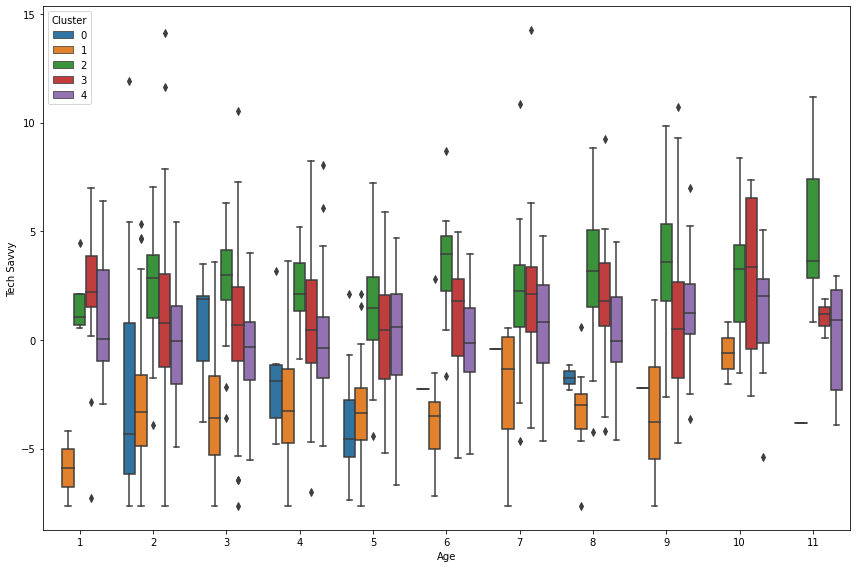

In [50]:
ig, ax = plt.subplots(figsize = (12, 8))
sns.boxplot(x = 'Age',
            y = 'Tech Savvy',
            hue = 'Cluster',
            data = data_df)


# formatting and displaying the plot
plt.tight_layout()
plt.show()